In [120]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
wine = pd.read_csv('winequality-red.csv')

In [121]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


<Figure size 720x432 with 0 Axes>

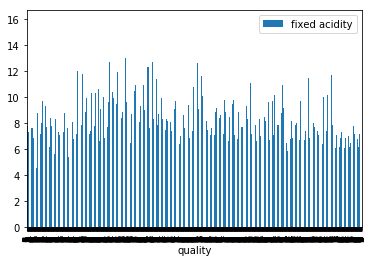

In [123]:
fig = plt.figure(figsize = (10,6))
wine.plot.bar(x='quality', y='fixed acidity')
plt.show()

In [124]:
fig1 = plt.figure(figsize=(10,6))
sns.countplot

<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

<Figure size 720x432 with 0 Axes>

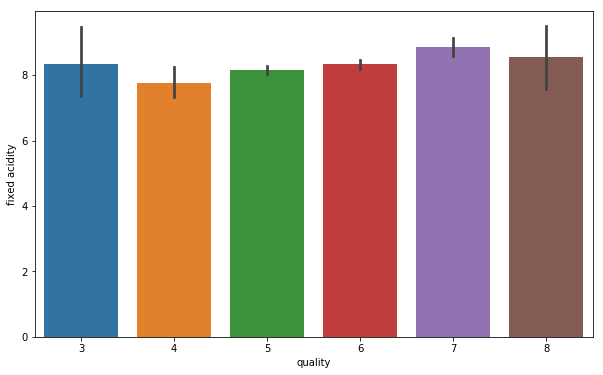

In [125]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

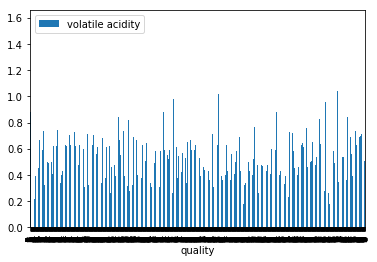

In [126]:
wine.plot(kind = 'bar', x = 'quality', y = 'volatile acidity')
plt.show()

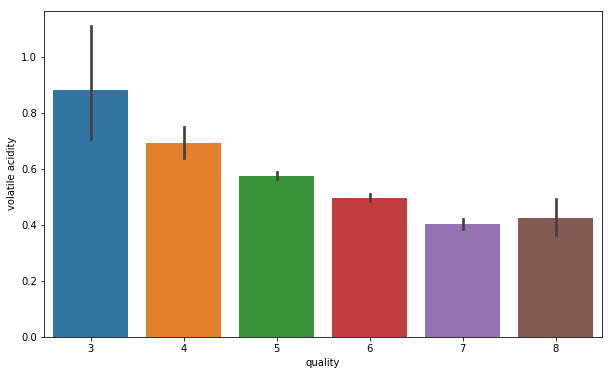

In [127]:
fig2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [128]:
reviews = []
for i in wine['quality']:
    if i >= 2 and i < 5.5:
        reviews.append('0')
    elif i >= 5.5 and i <= 8:
        reviews.append('1')
wine['Reviews'] = reviews

In [129]:
wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [130]:
from collections import Counter
Counter(wine['Reviews'])

Counter({'0': 744, '1': 855})

In [131]:
label_quality = LabelEncoder()

In [132]:
wine['Reviews'] = label_quality.fit_transform(wine['Reviews'])

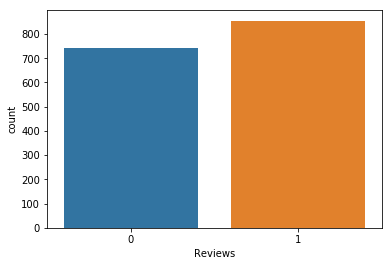

In [133]:
sns.countplot(wine['Reviews'])

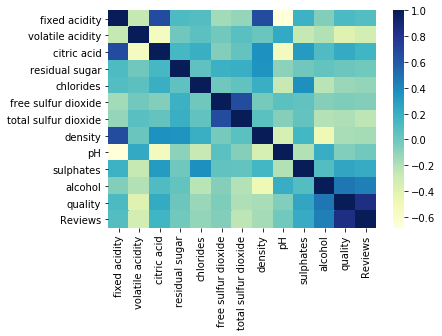

In [144]:
sns.heatmap(wine.corr(), cmap="YlGnBu")
plt.show()

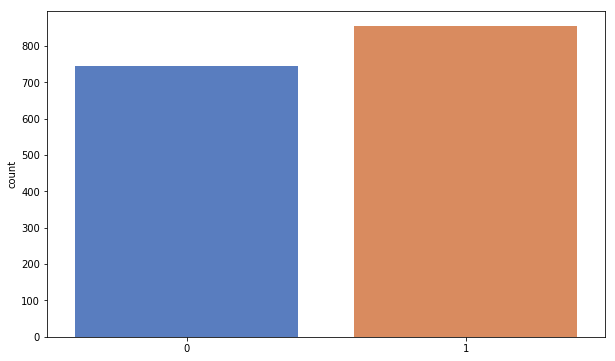

In [145]:
# plt.figure(figsize=(10, 6))
# sns.countplot(reviews, palette="muted")


In [146]:
category = pd.DataFrame(data=reviews, columns=["Reviews"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2018)

### Building models

In [ ]:
clf = RandomForestClassifier(random_state=0)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=510)
rfc_gs.fit(X_train, y_train)

In [ ]:
rfc_gs.best_score_

In [152]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)

In [155]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params,
                      scoring='accuracy',
                      cv=skf)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__C': [0.1, 0.3, 1, 3, 10], 'clf__gamma': [0.1, 0.3, 1, 3, 10], 'clf__kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [156]:
print(gs_svm.best_score_)

0.8803752931978108
